In [2]:
!pip install mlflow

import numpy as np
import pandas as pd
import shap
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (
    accuracy_score, recall_score, precision_score, f1_score,
    roc_auc_score, log_loss, confusion_matrix, ConfusionMatrixDisplay,
    RocCurveDisplay, roc_curve
)
import mlflow
import mlflow.sklearn
import matplotlib.pyplot as plt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.2/28.2 MB 23.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 27.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 684.0/684.0 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.4/203.4 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.7 MB/s eta 0:00:00


In [3]:
credito = pd.read_csv('/content/drive/MyDrive/Credit.csv')

print(f"Colunas:{credito.columns}")

print(f"Número de linhas: {credito.shape[0]}")
print(f"Número de colunas: {credito.shape[1]}")

Colunas:Index(['checking_status', 'duration', 'credit_history', 'purpose',
       'credit_amount', 'savings_status', 'employment',
       'installment_commitment', 'personal_status', 'other_parties',
       'residence_since', 'property_magnitude', 'age', 'other_payment_plans',
       'housing', 'existing_credits', 'job', 'num_dependents', 'own_telephone',
       'foreign_worker', 'class'],
      dtype='object')
Número de linhas: 1000
Número de colunas: 21


In [ ]:
credito

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,'critical/other existing credit',radio/tv,1169,'no known savings',>=7,4,'male single',none,...,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,'existing paid',radio/tv,5951,<100,1<=X<4,2,'female div/dep/mar',none,...,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,<100,4<=X<7,2,'male single',none,...,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,<0,42,'existing paid',furniture/equipment,7882,<100,4<=X<7,2,'male single',guarantor,...,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,<0,24,'delayed previously','new car',4870,<100,1<=X<4,3,'male single',none,...,'no known property',53,none,'for free',2,skilled,2,none,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,'no checking',12,'existing paid',furniture/equipment,1736,<100,4<=X<7,3,'female div/dep/mar',none,...,'real estate',31,none,own,1,'unskilled resident',1,none,yes,good
996,<0,30,'existing paid','used car',3857,<100,1<=X<4,4,'male div/sep',none,...,'life insurance',40,none,own,1,'high qualif/self emp/mgmt',1,yes,yes,good
997,'no checking',12,'existing paid',radio/tv,804,<100,>=7,4,'male single',none,...,car,38,none,own,1,skilled,1,none,yes,good
998,<0,45,'existing paid',radio/tv,1845,<100,1<=X<4,4,'male single',none,...,'no known property',23,none,'for free',1,skilled,1,yes,yes,bad


In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# # Selecionar variáveis preditoras específicas e alvo
variaveis_selecionadas = ['checking_status', 'duration', 'credit_history', 'purpose',
       'credit_amount', 'savings_status', 'employment',
       'installment_commitment', 'personal_status', 'other_parties',
       'residence_since', 'property_magnitude', 'age', 'other_payment_plans',
       'housing', 'existing_credits', 'job', 'num_dependents', 'own_telephone',
       'foreign_worker']

# Assumindo que 'credito' seja o DataFrame com os dados
X = credito[variaveis_selecionadas]
y = credito["class"]  # Apenas a variável alvo

# Converter variáveis categóricas em numéricas
X = pd.get_dummies(X, drop_first=True)

# Normalizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Modelos
logistic_model = LogisticRegression()
decision_tree_model = DecisionTreeClassifier()
svm_model = SVC()
random_forest_model = RandomForestClassifier(random_state=42)

# Treinamento dos modelos
logistic_model.fit(X_train, y_train)
decision_tree_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)

# Predições
y_pred_logistic = logistic_model.predict(X_test)
y_pred_tree = decision_tree_model.predict(X_test)
y_pred_svm = svm_model.predict(X_test)
y_pred_forest = random_forest_model.predict(X_test)

# Avaliação dos Modelos
results = {
    "Regressão Logística": {
        "Acurácia": accuracy_score(y_test, y_pred_logistic),
        "Precisão": precision_score(y_test, y_pred_logistic, average='weighted'),
        "Recall": recall_score(y_test, y_pred_logistic, average='weighted'),
        "F1-score": f1_score(y_test, y_pred_logistic, average='weighted')
    },
    "Árvore de Decisão": {
        "Acurácia": accuracy_score(y_test, y_pred_tree),
        "Precisão": precision_score(y_test, y_pred_tree, average='weighted'),
        "Recall": recall_score(y_test, y_pred_tree, average='weighted'),
        "F1-score": f1_score(y_test, y_pred_tree, average='weighted')
    },
    "SVM": {
        "Acurácia": accuracy_score(y_test, y_pred_svm),
        "Precisão": precision_score(y_test, y_pred_svm, average='weighted'),
        "Recall": recall_score(y_test, y_pred_svm, average='weighted'),
        "F1-score": f1_score(y_test, y_pred_svm, average='weighted')
    },
    "Random Forest": {
        "Acurácia": accuracy_score(y_test, y_pred_forest),
        "Precisão": precision_score(y_test, y_pred_forest, average='weighted'),
        "Recall": recall_score(y_test, y_pred_forest, average='weighted'),
        "F1-score": f1_score(y_test, y_pred_forest, average='weighted')
    }
}

# Exibir Resultados
results_df = pd.DataFrame(results).T
print(results_df)

                     Acurácia  Precisão    Recall  F1-score
Regressão Logística  0.716667  0.690360  0.716667  0.686056
Árvore de Decisão    0.716667  0.719357  0.716667  0.717940
SVM                  0.723333  0.699827  0.723333  0.695465
Random Forest        0.736667  0.724963  0.736667  0.728247


**REDES NEURAIS**

In [18]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Função para construir o modelo
def create_model(optimizer='adam', neurons=16):
    model = Sequential([
        Dense(neurons, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(neurons, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Classe customizada para integrar o Keras com o RandomizedSearchCV
class KerasModel:
    def __init__(self, optimizer='adam', neurons=16):
        self.optimizer = optimizer
        self.neurons = neurons
        self.model = create_model(optimizer=self.optimizer, neurons=self.neurons)

    def fit(self, X, y, epochs=50, batch_size=16):
        # Callbacks para desempenho: EarlyStopping e redução da taxa de aprendizado
        callbacks = [
            EarlyStopping(monitor='loss', patience=5, restore_best_weights=True),
            ReduceLROnPlateau(monitor='loss', factor=0.5, patience=3)
        ]
        self.model.fit(X, y, epochs=epochs, batch_size=batch_size, verbose=0, callbacks=callbacks)

    def predict(self, X):
        # Prediz probabilidades e converte para classes usando threshold de 0.4
        y_pred_prob = self.model.predict(X, verbose=0)
        return (y_pred_prob > 0.4).astype(int)

    def score(self, X, y):
        y_pred = self.predict(X)
        return accuracy_score(y, y_pred)

    def get_params(self, deep=True):
        return {
            'optimizer': self.optimizer,
            'neurons': self.neurons
        }

    def set_params(self, **params):
        for param, value in params.items():
            setattr(self, param, value)
        # Recria o modelo com os novos parâmetros
        self.model = create_model(optimizer=self.optimizer, neurons=self.neurons)
        return self

# --- Processamento dos dados ---

# Seleção das variáveis preditoras e da variável alvo
variaveis_selecionadas = ['checking_status', 'duration', 'credit_history', 'purpose',
       'credit_amount', 'savings_status', 'employment',
       'installment_commitment', 'personal_status', 'other_parties',
       'residence_since', 'property_magnitude', 'age', 'other_payment_plans',
       'housing', 'existing_credits', 'job', 'num_dependents', 'own_telephone',
       'foreign_worker']

# Certifique-se de que o DataFrame 'credito' já esteja carregado
X = credito[variaveis_selecionadas]
y = credito["class"]

# Converter variáveis categóricas em numéricas
X = pd.get_dummies(X, drop_first=True)

# Converter a variável alvo para valores numéricos
le = LabelEncoder()
y = le.fit_transform(y)

# Normalizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir os dados em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# --- Busca de hiperparâmetros com RandomizedSearchCV ---

# Definição do espaço de hiperparâmetros
param_dist = {
    'neurons': [8, 16, 32, 64],
    'optimizer': ['adam', 'rmsprop', 'sgd'],
    'batch_size': [16, 32, 64],
    'epochs': [50, 100, 150]
}

# Instância do modelo customizado
model = KerasModel()

# RandomizedSearchCV com 3 folds e 5 iterações
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist,
                                   n_iter=5, cv=3, verbose=1, random_state=42)
random_search.fit(X_train, y_train)

print("Melhores parâmetros encontrados:", random_search.best_params_)

# Avaliação do modelo com os melhores parâmetros
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

results = {
    "Rede Neural (Random Search)": {
        "Acurácia": accuracy_score(y_test, y_pred),
        "Precisão": precision_score(y_test, y_pred, average='weighted'),
        "Recall": recall_score(y_test, y_pred, average='weighted'),
        "F1-score": f1_score(y_test, y_pred, average='weighted')
    }
}

results_df = pd.DataFrame(results).T
print(results_df)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Fitting 3 folds for each of 5 candidates, totalling 15 fits


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/lo

Melhores parâmetros encontrados: {'optimizer': 'sgd', 'neurons': 64, 'epochs': 50, 'batch_size': 64}
                             Acurácia  Precisão  Recall  F1-score
Rede Neural (Random Search)     0.795  0.786302   0.795   0.78525


**ANÁLISE DE VARIÁVEIS COM SHAP - DECISION TREE**



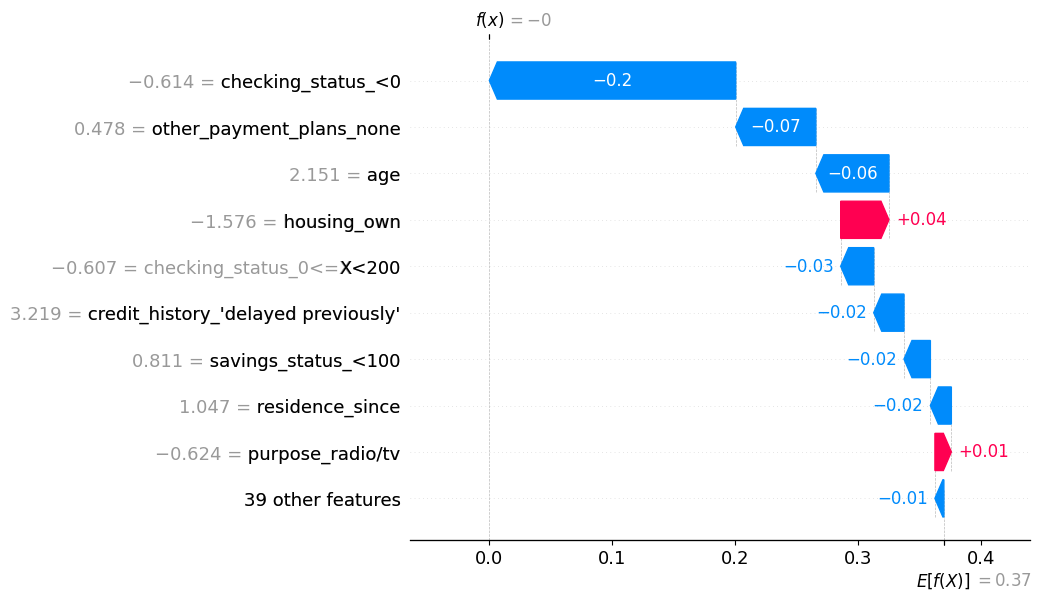

In [5]:
# Análise de importância das variáveis com SHAP
explainer = shap.Explainer(decision_tree_model, X_train)
shap_values = explainer(X_train)

# Supondo que X é seu DataFrame original com os nomes das features
feature_names = X.columns.tolist()

# Extrair os valores para a primeira instância e o primeiro output
single_values = shap_values.values[0, :, 0]         # vetor dos valores SHAP (1D)
single_base = shap_values.base_values[0, 0]           # valor base escalar
single_data = shap_values.data[0]                     # dados da instância

# Criar uma nova explicação incluindo os nomes das features
single_explanation = shap.Explanation(
    values=single_values,
    base_values=single_base,
    data=single_data,
    feature_names=feature_names
)

# Plotar o waterfall com os nomes das features
shap.plots.waterfall(single_explanation)

**ANÁLISE DE VARIÁVEIS COM SHAP - REGRESSION LOGISTIC**

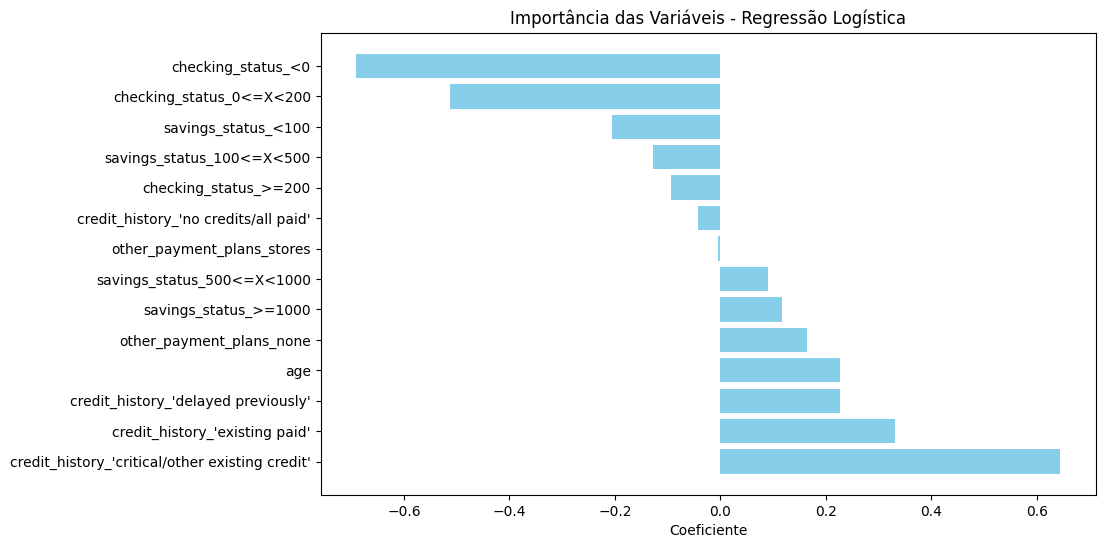

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Coletando os coeficientes do modelo de regressão logística
coef = logistic_model.coef_[0]  # Para o modelo binário, coeficientes da classe 1
features = X.columns

# Organizar os coeficientes em um DataFrame
coef_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': coef
})

# Ordenar os coeficientes em ordem decrescente de importância
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)

# Plotar a importância das variáveis
plt.figure(figsize=(10, 6))
plt.barh(coef_df['Feature'], coef_df['Coefficient'], color='skyblue')
plt.xlabel('Coeficiente')
plt.title('Importância das Variáveis - Regressão Logística')
plt.show()

**ANÁLISE DE VARIÁVEIS COM SHAP - SVM**

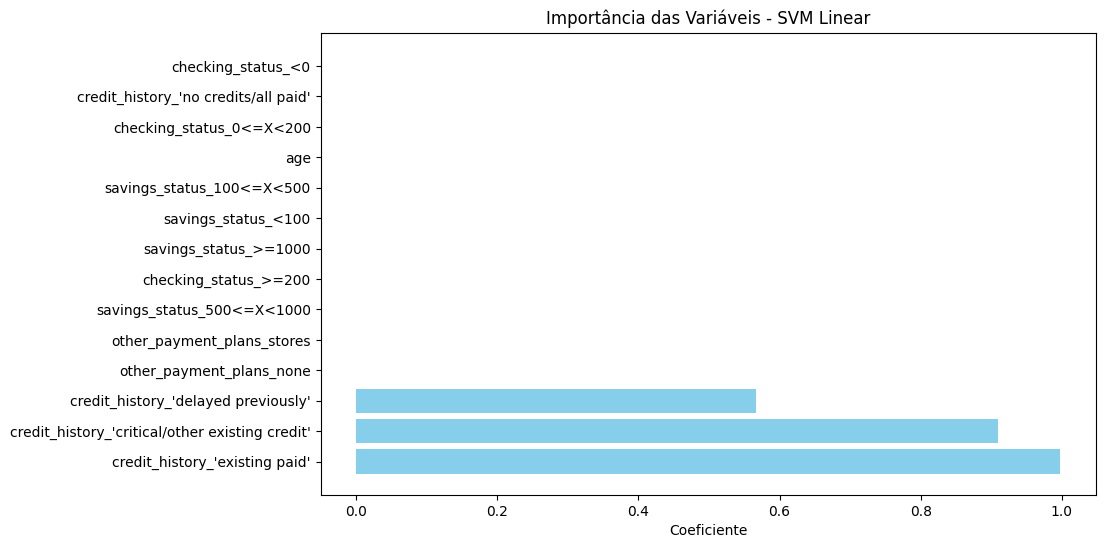

In [ ]:
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Alterar o SVC para usar um kernel linear
svm_model = SVC(kernel='linear', probability=True)
svm_model.fit(X_train, y_train)

# Coletando os coeficientes do modelo de regressão logística (SVM com kernel linear)
coef = svm_model.coef_[0]  # Para o modelo binário, coeficientes da classe 1
features = X.columns

# Organizar os coeficientes em um DataFrame
coef_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': coef
})

# Ordenar os coeficientes em ordem decrescente de importância
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)

# Plotar a importância das variáveis
plt.figure(figsize=(10, 6))
plt.barh(coef_df['Feature'], coef_df['Coefficient'], color='skyblue')
plt.xlabel('Coeficiente')
plt.title('Importância das Variáveis - SVM Linear')
plt.show()